# INFOSCI 2950: Final Project Phase II Submission

---
## Research Questions

**Main Goal: How can we define Asian-American communities in terms of health, happiness, and financial security?**

*Financial Security*
1. Do some ethnic groups of Asian-Americans in Texas earn more than others?
2. Do younger Asian-Americans earn more money than older generations of Asian Americans living in Texas?
3. How does household size relate to duration of residency for AAs in Texas?
*Happiness*
1. Are some ethnic groups more likely to be born in the United States than others?
2. What are the most dominant religions among ethnic groups in Asian-American communities in Texas?
3. How is English speaking ability related to English difficulty among AA communities in Texas?
4. Are certain religious groups within AAs more likely to experience discrimination than other relgious groups within AAs in Texas?
5. Are certain ethnic groups within AAs more likely to experience discrimination than other ethnic groups within AAs in Texas?
*Health*
1. Is smoking among Asian-American populations linked to heart disease?
2. Are older generations of AAs more likely to follow a healthy diet than younger generations of AAs in Texas?



---

## Data Collection and Cleaning
### Data Collection
1. Go to data [landing page](https://data.austintexas.gov/City-Government/Final-Report-of-the-Asian-American-Quality-of-Life/hc5t-p62z). 
2. Click on Export > CSV.
3. Download publicly available `Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_.csv` into desired directory.

### Data Cleaning
1. Store raw data into a preliminary dataframe, `df`
2. Convert column names into snake_case

In [1]:
## <TO-DO> Paste affliated code here!



In [2]:
## load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
## Step 1
df = pd.read_csv('Final_Report_of_the_Asian_American_Quality_of_Life__AAQoL_.csv')

In [4]:
## Step 2
new_colnames = [i.lower() for i in df.columns]
new_colnames = [i.replace(" ","_") for i in new_colnames]

#### Column Names
3. Save these new column names to a new dataframe, `asian`
4. Select columns from the existing `asian` dataframe for data analysis
- [ ] Income
- [ ] Retired
- [ ] US Born
- [ ] English Speaking
- [ ] English Difficulties
- [ ] Ethnicity
- [ ] Age
- [ ] Regular Exercise
- [ ] Healthy Diet
- [ ] Heart Disease
- [ ] Drinking
- [ ] Smoking
- [ ] Cancer
- [ ] Health Insurance
- [ ] Physical Check-up
- [ ] Quality of Life
- [ ] Religion
- [ ] Gender
- [ ] Close Friends
- [ ] Discrimination
- [ ] Duration of Residency
- [ ] Household Size
- [ ] Education Completed
- [ ] Cleaning Entries

In [6]:
## Step 3
asian = df.copy()
asian.columns = new_colnames

In [7]:
## Step 4
asian = asian[['income', 'retired', 'us_born', 'english_speaking', 'english_difficulties', 'ethnicity','age', 'regular_exercise', 'healthy_diet', 'heart_disease', 'drinking', 'smoking',
               'cancer', 'health_insurance', 'physical_check-up', 'quality_of_life', 'religion', 'gender', 'close_friends', 'discrimination_', 'duration_of_residency', 'household_size',
              'education_completed']]
# Additional improvements to asian
asian = asian.rename(columns = {'discrimination_':'discrimination', 'physical_check-up':'physical_checkup'})

#### Cleaning Entries
5. For the corresponding columns, convert null data according to the table below:

| Column                | Modification to NaNs           |
|-----------------------|--------------------------------|
| Duration of residency | -1                             |
| Education completed   | -1                             |
| Discrimination        | 0                              |
| Household size        | 0                              |
| Quality of Life       | middle value for responses (5) |
| Gender                | "Unknown"                      |
| Ethnicity             | "Unknown"                      |
| Religion              | "Unknown"                      |
| Age                   | median age                     |
| Close Friends         | median number of friends       |
| Income                | rows with NaNs are dropped     |

6. Replace column data to binary responses with 1s indicating ‘Yes’es and 0s indicating ‘No’es
8. Convert column data into intended data types
| Column                | Data Type                                                                          |
|-----------------------|------------------------------------------------------------------------------------|
| income                | int: {0 (for NaNs), 1 (0-9999), 2 (10000-19999), ..., 7 (60000-69999), 8 (70000+)} |
| retired               | int: {0 for Noes, 1 for Yeses}                                                     |
| US Born               | int: {0 for Noes, 1 for Yeses}                                                     |
| English Speaking      | int: {'Not at all': 1, 'Not well': 2, 'Well': 3, 'Very well': 4}                                                                    |
| English Difficulties  | int: {'Not at all': 1, 'Not much': 2, 'Much': 3, 'Very much': 4}                                                                            |
| Ethnicity             | String                                                                             |
| Age                   | int                                                                                |
| Regular Exercise      | int: {0 for Noes, 1 for Yeses}                                                     |
| Healthy Diet          | int: {0 for Noes, 1 for Yeses}                                                     |
| Heart Disease         | int: {0 for Noes, 1 for Yeses}                                                     |
| Drinking              | int: {0 for Noes, 1 for Yeses}                                                     |
| Smoking               | int: {0 for Noes, 1 for Yeses}                                                     |
| Cancer                | int: {0 for Noes, 1 for Yeses}                                                     |
| Health Insurance      | int: {0 for Noes, 1 for Yeses}                                                     |
| Physical Check-up     | int: {0 for Noes, 1 for Yeses}                                                     |
| Quality of Life       |    'Not at all': 1, 'Not well': 2, 'Well': 3, 'Very well': 4                                                                                |
| Religion              | String                                                                             |
| Gender                | String                                                                             |
| Close Friends         |    floats                                                                                |
| Discrimination        | int: {0 for Noes, 1 for Yeses}                                                     |
| Duration of Residency | float                                                                              |
| Household Size        | int                                                                                |
| Education Completed   |    int                                                                                |

In [9]:
## Step 5, 6, 7

#changing english_speaking column to be represented by floats
asian['english_speaking'].replace({'Not at all': 1, 'Not well': 2, 'Well': 3, 'Very well': 4}, inplace = True)
asian['english_speaking'] = asian['english_speaking'].astype(float, errors = 'raise')
#replacing NaNs with 0
asian['english_speaking'] = asian['english_speaking'].fillna(0)
    
# changing english_difficulties column to be represented by floats
asian['english_difficulties'].replace({'Not at all': 1, 'Not much': 2, 'Much': 3, 'Very much': 4}, inplace = True)
#replacing NaNs with 0
asian['english_difficulties'] = asian['english_difficulties'].fillna(0)

# changing retired column to to be represented by floats
asian["retired"].replace({"Retired": 1}, inplace=True)
asian["retired"] = asian["retired"].astype(float, errors='raise')
#replacing NaNs with 0
asian['retired'] = asian['retired'].fillna(0)

# changing us_born column to to be represented by floats
asian["us_born"].replace({"No": 0, "Yes": 1}, inplace=True)
#replacing NaNs with 0
asian['us_born'] = asian['us_born'].fillna(0)

#replacing NaNs with 0
asian['health_insurance'] = asian['health_insurance'].fillna(0)
# changing health_insurance column 
asian['health_insurance'].replace({"Yes": "1"}, inplace=True)

#replacing NaNs with 0
asian['physical_checkup'] = asian['physical_checkup'].fillna(0)

# changing physical_checkup column 
asian["physical_checkup"].replace({"Yes": "1"}, inplace=True)

#replacing NaNs with 0
asian['us_born'] = asian['us_born'].fillna(0)

# changing regular_exercise column to 0 and 1
#replacing NaNs with 0
asian['regular_exercise'] = asian['regular_exercise'].fillna(0)

#replacing NaNs with 0
asian['healthy_diet'] = asian['healthy_diet'].fillna(0)

#replacing NaNs with 0
asian['heart_disease'] = asian['heart_disease'].fillna(0)

#replacing NaNs with 0
asian['healthy_diet'] = asian['healthy_diet'].fillna(0)

#replacing NaNs with 5.0
asian['quality_of_life'] = asian['quality_of_life'].fillna(5.0)

#replacing NaNs with 0
asian['discrimination'] = asian['discrimination'].fillna(0)

#replacing NaNs with -1
asian['duration_of_residency'] = asian['duration_of_residency'].fillna(-1)

#replacing NaNs with 0 because household_size can not be 0 because participants are counting themselves
asian['household_size'] = asian['household_size'].fillna(0)

#replacing NaNs with -1
asian['education_completed'] = asian['education_completed'].fillna(0)

#replacing NaNs with Unknown
asian['gender'] = asian['gender'].fillna('Unknown')

#replacing NaNs with Unknown
asian['ethnicity'] = asian['ethnicity'].fillna('Unknown')

#replacing NaNs with Unknown
asian['religion'] = asian['religion'].fillna('Unknown')

#replacing NaNs with median age
asian['age'] = asian['age'].fillna(40.0)

#replacing NaNs with median number of close friends
asian['close_friends'] = asian['close_friends'].fillna(3.0)

# changing income column entries to be represented by integers
asian['income'] = asian['income'].replace({'$0 - $9,999': 1, '$10,000 - $19,999': 2, '$20,000 - $29,999': 3, '$30,000 - $39,999': 4, 
                        '$40,000 - $49,999': 5, '$50,000 - $59,999': 6, '$60,000 - $69,999': 7, '$70,000 and over': 8})

asian = asian.dropna()
asian.reset_index(drop=True, inplace=True)


In [10]:
asian.head()

,income,retired,us_born,english_speaking,english_difficulties,ethnicity,age,regular_exercise,healthy_diet,heart_disease,...,health_insurance,physical_checkup,quality_of_life,religion,gender,close_friends,discrimination,duration_of_residency,household_size,education_completed
0,1.0,0.0,0.0,3.0,3.0,Chinese,23.0,0.0,1.0,0.0,...,0,1,8.0,Buddhist,Female,4.0,0.0,11.0,3.0,16.0
1,8.0,0.0,0.0,3.0,3.0,Asian Indian,28.0,1.0,0.0,0.0,...,1,1,8.0,Hindu,Male,3.0,0.0,7.0,2.0,17.0
2,8.0,0.0,0.0,4.0,1.0,Asian Indian,47.0,0.0,0.0,0.0,...,0,0,5.0,Muslim,Male,3.0,0.0,20.0,5.0,17.0
3,6.0,0.0,0.0,4.0,1.0,Asian Indian,25.0,1.0,1.0,0.0,...,1,1,10.0,Hindu,Male,5.0,0.0,2.0,1.0,17.0
4,8.0,1.0,0.0,4.0,1.0,Asian Indian,60.0,1.0,1.0,0.0,...,1,1,9.0,Hindu,Female,2.0,0.0,47.0,3.0,17.0


---

## Data Description
The observations are the Asian-Americans surveyed in Austin, Texas. The attributes are a range of quality of life measurements. This dataset will help us understand the rapid growth rate and unique challenges as a new immigrant group calls for a better understanding of the social and health needs of the Asian American population. This dataset was funded by the City of Austin’s Public Information Office. Researchers and participants guided the observation of data. During the study, participants elevated their responses by adding “respect and appreciation of diverse cultures and acknowledgement of the legacy of the Asian community in Austin. The kind of data that was recorded focused on the project's goal to improve the city of Austin’s Asian American resources on health, housing,  culture, civic engagement, and economic development. The data came to formation through a three-year community engagement process. Commissioners, consultants and City staff worked with partner agencies and individual volunteers to meet Asian American community members where they live, work and play. More than 3,350 individuals took one of two surveys during the initiative either online or in-person at a variety of locations throughout the city, “Conversation Over Tea,” and other City of Austin hosted meetings to facilitate dialogue and share anecdotes about their lives. Additionally, “travel booths” were present at various events throughout the city engaging hundreds of Asian Americans. Participation included almost every ZIP code within the city and adjacent areas. The people involved were aware of the data collection. They were surprised to learn that the data was to be used for the City of Austin to hear about their dreams, challenges and contributions. A raw source to the data can be found [here](https://data.austintexas.gov/City-Government/Final-Report-of-the-Asian-American-Quality-of-Life/hc5t-p62z), under Export > CSV configurations.

---

## Data Limitations

Limited amount of quantitative data values will make it difficult to generate traditional-looking scatterplots and visualize possible relationships between variables. We foresee a barriers in conducting assessments that predict based off of existing trends due to this. When addressing demographics, the lack of records for previous years will be an obstacle when making comparisons on whether factors measuring the quality of life of Asian-Americans progressed or regressed. One real-world impact that can be derived from this limitation is that Asian-Americans will be less able to identify existing quality-of-life indicators, and  practices that the city of Austin should continue or cease based off patterns in the data. This will restrict the level of specificity in insights concerning emerging patterns we see. Data collected is also limited to representing the attitudes of Asian-Americans living in Texas. Their environment, for example, may be different from the attitudes of Asian-Americans in more or less urban areas, and cannot encapsulate the attitudes of all Asian-Americans. The meaning of the results in this case, would be less useful in terms of its applicability as we do not have randomly-sampled results of all Asian-Americans. This datasets' quality of record-keeping also faltered in areas where respondents were able to leave answers blank. This consequently resulted in NaNs, impacting the meaning of the results  

Certain ethnic groups dominate over others which may lead to skewed results when extrapolating quality of life measurements in mentioning the atittudes of Asian-American populations. For example, out of all the ethnic groups described, Protestant Asian-Americans reported experiencing the highest amount of discrimination. However, it would be innaccurate to assume that Protestantism is a motivating factor for racists to engage in discriminatory behaviors towards Asian-Americans. Some response variables will be affected by confounding variables such as different cultural aspects among sub-ethnic groups. (e.g. some ethnic groups have leaner diets which would impact conclusions drawn when studying Asian-American health). In this case, the higher rates of discrimination can also be explained in how the data shows Korean-Americans are primarily of Protestant faith. Given that they were also the ethnicity group to report the highest amounts of discrimination, this shows how the data can only go so far to explain why certain qualities might cause others. 

---

In [13]:
for col in asian.columns:
    display(asian[col].value_counts())
    print()

8.0    967
1.0    241
2.0    197
4.0    196
3.0    190
7.0    183
5.0    167
6.0    166
Name: income, dtype: int64

0.0    2072
1.0     235
Name: retired, dtype: int64

0.0    2082
1.0     225
Name: us_born, dtype: int64

4.0    912
3.0    727
2.0    547
1.0    115
0.0      6
Name: english_speaking, dtype: int64

1.0    719
2.0    649
3.0    475
4.0    447
0.0     17
Name: english_difficulties, dtype: int64

Chinese         556
Asian Indian    508
Vietnamese      451
Korean          425
Filipino        238
Other           129
Name: ethnicity, dtype: int64

25.0    76
40.0    71
32.0    71
30.0    66
33.0    62
        ..
79.0     2
89.0     2
98.0     1
87.0     1
88.0     1
Name: age, Length: 72, dtype: int64

1.0    1412
0.0     895
Name: regular_exercise, dtype: int64

1.0    1846
0.0     461
Name: healthy_diet, dtype: int64

0.0    2307
Name: heart_disease, dtype: int64

0.0    2234
1.0      73
Name: drinking, dtype: int64

0.0    2160
1.0     147
Name: smoking, dtype: int64

0.0    2307
Name: cancer, dtype: int64

1    1982
0     320
0       5
Name: health_insurance, dtype: int64

1    1535
0     752
0      20
Name: physical_checkup, dtype: int64

8.0     713
7.0     433
9.0     404
10.0    306
5.0     191
6.0     185
4.0      44
3.0      20
2.0       7
1.0       4
Name: quality_of_life, dtype: int64

Protestant    565
None          463
Catholic      442
Hindu         420
Buddhist      308
Muslim         59
Other          41
Unknown         9
Name: religion, dtype: int64

Female     1221
Male       1068
Unknown      18
Name: gender, dtype: int64

3.0    777
2.0    609
1.0    327
4.0    222
5.0    187
0.0    185
Name: close_friends, dtype: int64

0.0    1671
1.0     636
Name: discrimination, dtype: int64

2.00     151
1.00     148
3.00     103
20.00    102
10.00    101
        ... 
0.75       1
59.00      1
6.50       1
53.00      1
54.00      1
Name: duration_of_residency, Length: 65, dtype: int64

2.0    635
4.0    609
3.0    497
5.0    209
1.0    181
6.0    108
7.0     34
8.0     24
0.0     10
Name: household_size, dtype: int64

17.0    847
16.0    680
12.0    282
14.0    155
13.0    112
15.0    107
10.0     24
0.0      21
11.0     18
9.0      17
6.0      16
8.0      10
7.0      10
5.0       5
2.0       1
3.0       1
4.0       1
Name: education_completed, dtype: int64

### Sample Summary Statistics

In [53]:
asian.describe()

,income,retired,us_born,english_speaking,english_difficulties,age,regular_exercise,healthy_diet,heart_disease,drinking,smoking,cancer,quality_of_life,close_friends,discrimination,duration_of_residency,household_size,education_completed
count,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.0,2307.000000,2307.000000,2307.0,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000,2307.000000
mean,5.564369,0.101864,0.097529,3.050715,2.267013,41.506285,0.612050,0.800173,0.0,0.031643,0.063719,0.0,7.693975,2.470308,0.275683,15.505375,3.251409,15.069354
std,2.588519,0.302535,0.296741,0.923591,1.118619,16.236285,0.487389,0.399957,0.0,0.175085,0.244305,0.0,1.607110,1.301263,0.446955,12.558324,1.452363,2.697764
min,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,2.000000,1.000000,28.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.0,7.000000,2.000000,0.000000,5.000000,2.000000,14.000000
50%,6.000000,0.000000,0.000000,3.000000,2.000000,39.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.0,8.000000,3.000000,0.000000,13.000000,3.000000,16.000000
75%,8.000000,0.000000,0.000000,4.000000,3.000000,52.000000,1.000000,1.000000,0.0,0.000000,0.000000,0.0,9.000000,3.000000,1.000000,24.000000,4.000000,17.000000
max,8.000000,1.000000,1.000000,4.000000,4.000000,98.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,10.000000,5.000000,1.000000,78.000000,8.000000,17.000000


In [56]:
asian.median()

income                    6.0
retired                   0.0
us_born                   0.0
english_speaking          3.0
english_difficulties      2.0
age                      39.0
regular_exercise          1.0
healthy_diet              1.0
heart_disease             0.0
drinking                  0.0
smoking                   0.0
cancer                    0.0
health_insurance          1.0
physical_checkup          1.0
quality_of_life           8.0
close_friends             3.0
discrimination            0.0
duration_of_residency    13.0
household_size            3.0
education_completed      16.0
dtype: float64

Median household income for Asian Americans living in Austin, Texas:

In [55]:
asian['income'].median()

income                    6.0
retired                   0.0
us_born                   0.0
english_speaking          3.0
english_difficulties      2.0
age                      39.0
regular_exercise          1.0
healthy_diet              1.0
heart_disease             0.0
drinking                  0.0
smoking                   0.0
cancer                    0.0
health_insurance          1.0
physical_checkup          1.0
quality_of_life           8.0
close_friends             3.0
discrimination            0.0
duration_of_residency    13.0
household_size            3.0
education_completed      16.0
dtype: float64

> The median income bracket for Asian-Americans living in Austin, Texas is between \\$50,000 - \\$59,999.

In [54]:
asian['us_born'].value_counts()

0.0    2082
1.0     225
Name: us_born, dtype: int64

> The majority of Asian-Americans living in Austin, TX are not born in the United States. (Nos: 2082 > Yeses: 225)

If performing statistical tests, do the distribution of the variables satisfy assumptions?
> One of the requirements for the chi-square test for independence is that we procure a large enough sample (counts > 5) and the samples are independent.

- Based on prior analysis of the data, we have determined that the number of counts (2307) is sufficient to perform statistical inference on. 

### Sample Relevant Plots

#### Distribution of ethnicities among Asian-Americans living in Austin, Texas

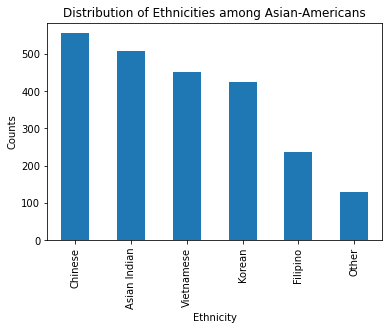

In [16]:
asian['ethnicity'].value_counts().plot(kind='bar');
plt.title("Distribution of Ethnicities among Asian-Americans")
plt.xlabel("Ethnicity")
plt.ylabel("Counts");

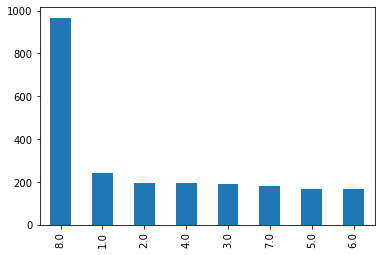

In [63]:
asian['income'].value_counts().plot(kind='bar');

#### Distribution of religious groups by ethnicity in Asian-American communities in Austin, Texas

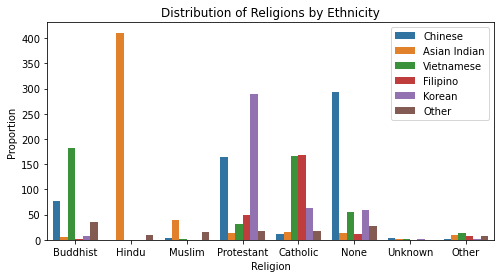

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(x='religion', data=asian, hue = 'ethnicity');
plt.legend(loc='upper right');
plt.xlabel("Religion")
plt.ylabel("Proportion");
plt.title("Distribution of Religions by Ethnicity");

#### Distribution of Natural Citizens by ethnicity in Asian-American communities in Austin, Texas

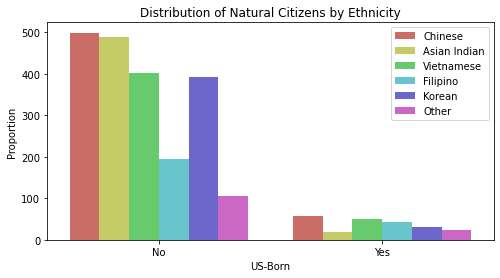

In [25]:
plt.figure(figsize=(8,4))
sns.countplot(x='us_born', data=asian, hue = 'ethnicity', palette = "hls");
plt.legend(loc='upper right');
plt.xlabel("US-Born")
plt.ylabel("Proportion");
plt.title("Distribution of Natural Citizens by Ethnicity");
positions = (0.0, 1.0);
labels = ("No", "Yes");
plt.xticks(positions, labels);

#### Median Income Brackets per Ethnicity

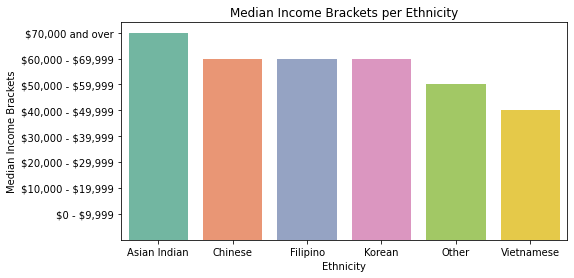

In [22]:
plt.figure(figsize=(8,4))
shakeshack = asian.groupby(['ethnicity'])['income'].median()
sns.barplot(x = shakeshack.index, y = shakeshack.values, palette = "Set2");
plt.xlabel("Ethnicity")
plt.ylabel("Median Income Brackets");
positions = (1, 2, 3, 4, 5, 6, 7, 8);                           
labels = ("\$0 - $9,999","\$10,000 - $19,999", "\$20,000 - $29,999", "\$30,000 - $39,999", "\$40,000 - $49,999", "\$50,000 - $59,999", "\$60,000 - $69,999", '$70,000 and over');
plt.yticks(positions, labels);
plt.title("Median Income Brackets per Ethnicity");

#### Percentage of Discrimination per Ethnicity

ethnicity
Asian Indian    0.169291
Chinese         0.318345
Filipino        0.264706
Korean          0.331765
Other           0.286822
Vietnamese      0.292683
Name: discrimination, dtype: float64


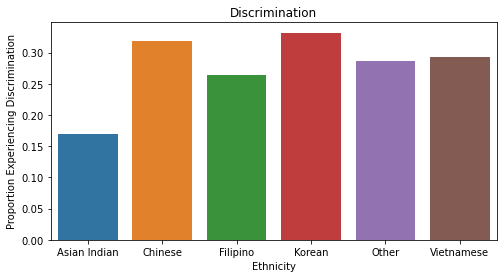

In [43]:
plt.figure(figsize=(8,4));
kfc = asian.groupby(['ethnicity'])['discrimination'].mean()
sns.barplot(x=kfc.index, data=asian, y = kfc.values);
plt.xlabel("Ethnicity");
plt.ylabel("Proportion Experiencing Discrimination");
plt.title("Discrimination");
print(kfc)

This pertains to research question 5 under Happiness. 

> Are certain ethnic groups within AAs more likely to experience discrimination than other ethnic groups within AAs in Texas?"

Based on the visualization produced above, 33.1% of Korean-Americans in Austin, Texas have experienced some form of discrimination, followed by 31.8% of Chinese with 16.9% of Indians reporting the least amount of discrimination.

#### Proportion Discrimination per Religion

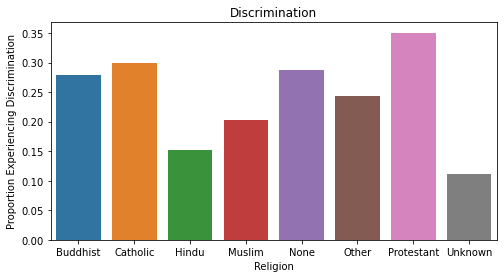

In [51]:
plt.figure(figsize=(8,4));
chikfila = asian.groupby(['religion'])['discrimination'].mean()
sns.barplot(x=chikfila.index, data=asian, y = chikfila.values);
plt.xlabel("Religion");
plt.ylabel("Proportion Experiencing Discrimination");
plt.title("Discrimination");

This pertains to research question 4 under Happiness.

> Are certain religious groups within AAs more likely to experience discrimination than other relgious groups within AAs in Texas?

Based on the visualization produced above, 35.0% of Asian-American Protestants in Austin, Texas have experienced some form of discrimination, followed by 29.9% of Catholics with 15.2% of Hindus reporting the least amount of discrimination.

---

## Questions for Reviewers

- Will we be penalized in the event that there certain hypothesis tests that we need to perform can be only be applied with quantitative data?